Carolina Niewöhner | Master Thesis | 19.07.2024


# GESIS dataset data cleaning

In this notebook the dataset of the population survey "LebensRäume" (LivingSpaces) is cleaned and missing values are treated. 
You can find the dataset <a href="https://search.gesis.org/research_data/ZA5851">here</a>.

## Importing packages

In [36]:
#importing packages

import pandas as pd
import numpy as np
import os
import pyreadstat 

## Importing data

In [37]:
# Get the current working directory
current_dir = os.getcwd()

In [38]:
df_gesis, meta = pyreadstat.pyreadstat.read_sav(f"{current_dir}/data/ZA5851_v1-0-0.sav")

In [39]:
#full table
df_gesis

,za_nr,version,doi,ID,jahr,welle,hgewicht,pgewicht,bula,westost1,...,s14s,s14sang,s15g1,s15g2,s15g3,s15g4,s15g5,s15g6,s15g7,s16s
0,5851.0,1.0.0 (2014-11-30),doi:10.4232/1.12070,230000333.0,2012.0,11.0,0.63,0.69,8.0,1.0,...,11.0,97.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0
1,5851.0,1.0.0 (2014-11-30),doi:10.4232/1.12070,230000626.0,2012.0,10.0,0.49,0.28,11.0,2.0,...,1.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
2,5851.0,1.0.0 (2014-11-30),doi:10.4232/1.12070,230000751.0,2012.0,11.0,0.61,1.33,8.0,1.0,...,11.0,97.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
3,5851.0,1.0.0 (2014-11-30),doi:10.4232/1.12070,230000866.0,2012.0,11.0,1.79,2.04,12.0,2.0,...,11.0,97.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
4,5851.0,1.0.0 (2014-11-30),doi:10.4232/1.12070,230000908.0,2012.0,10.0,0.37,0.21,11.0,2.0,...,3.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,5851.0,1.0.0 (2014-11-30),doi:10.4232/1.12070,230586523.0,2012.0,10.0,0.18,0.19,7.0,1.0,...,11.0,97.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0
3897,5851.0,1.0.0 (2014-11-30),doi:10.4232/1.12070,230587271.0,2012.0,10.0,0.28,0.15,10.0,1.0,...,5.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3898,5851.0,1.0.0 (2014-11-30),doi:10.4232/1.12070,230587272.0,2012.0,10.0,0.28,0.30,10.0,1.0,...,9.0,98.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0
3899,5851.0,1.0.0 (2014-11-30),doi:10.4232/1.12070,230587273.0,2012.0,10.0,0.11,0.06,10.0,1.0,...,6.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


## Dropping unrelevant columns

In [5]:
columns_to_remove = ['za_nr', 'version', 'doi','jahr','welle','hgewicht','pgewicht','bula','westost2','bik']

df_gesis_reduced=df_gesis.drop(columns=columns_to_remove)

## Defining interesting variables

First round of defining relevant variables. A second round is performed after the descriptives analysis.

In [6]:
#List of questions and new variables:

column_name_mapping = {
    'westost1': 'west_east',
    'sgtyp': 'city_type',
    'Q01S': 'inhabitants_city',
    'Q02S': 'rural_urban', # inside city / outside city --> due to nan values excluded
    'Q11S': 'ownership_rental',
    'Q29S': 'floor_area',
    'Q30S': 'number_rooms', # number of room excluding kitchen, bathroom, hallways, attics, basements and storerooms 
    'Q31S': 'satisfaction_size', #only possbility to say higher
    'Q35S': 'type_housing',
    's01s': 'sex',
    's02s': 'age',
    's03s': 'relationship_status',
    's05s': 'occupation',
    's11s': 'number_persons',
    's12g1': 'under_6y',
    's12g2': '6y_13y',
    's12g3': '14y_17y',
    's12g4': '18y_65y',
    's12g5': 'over_66y',
    's14s': 'income',
    's04g1': 'with_partner',
    's04g2': 'with_parents_adultchildren',
    's04g3': 'in_shared_flat',
    's04g4': 'alone'
    
}

# Rename columns using the rename() method
df_gesis_reduced.rename(columns=column_name_mapping, inplace=True)

In [7]:
q_relevant=["west_east","city_type","inhabitants_city","ownership_rental","floor_area","number_rooms","satisfaction_size",
            "type_housing","sex","age","relationship_status","occupation","number_persons","under_6y","6y_13y","14y_17y","18y_65y","over_66y",
            "income","with_partner","with_parents_adultchildren","in_shared_flat","alone"]
df_gesis_reduced2=df_gesis_reduced[q_relevant]

### First control of nans in the dataset

<Axes: >

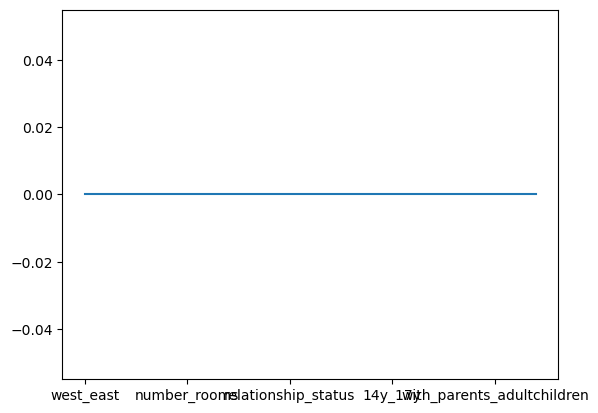

In [8]:
df_gesis_reduced2.isna().sum().plot()

 <code style="background:yellow;color:black"> **NO NAN VALUE** </code>

## Hot one encoding for for binary variables

### West east

In [9]:
df_gesis_reduced2['west_east'].isna().sum()

0

In [10]:
df_gesis_reduced2.loc[:, 'west'] = np.where(df_gesis_reduced2['west_east'] == 1, 1, 0)
df_gesis_reduced2.loc[:, 'east'] = np.where(df_gesis_reduced2['west_east'] == 2, 1, 0)

C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\989928942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'west'] = np.where(df_gesis_reduced2['west_east'] == 1, 1, 0)
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\989928942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'east'] = np.where(df_gesis_reduced2['west_east'] == 2, 1, 0)


### city type

In [11]:
df_gesis_reduced2['city_type'].isna().sum()

0

In [12]:
df_gesis_reduced2.loc[:, 'large_city'] = np.where(df_gesis_reduced2['city_type'] == 10, 1, 0)
df_gesis_reduced2.loc[:, 'medium_city'] = np.where(df_gesis_reduced2['city_type'] == 20, 1, 0)
df_gesis_reduced2.loc[:, 'large_small_town'] = np.where(df_gesis_reduced2['city_type'] == 30, 1, 0)
df_gesis_reduced2.loc[:, 'small_small_town'] = np.where(df_gesis_reduced2['city_type'] == 40, 1, 0)
df_gesis_reduced2.loc[:, 'rural_community'] = np.where(df_gesis_reduced2['city_type'] == 50, 1, 0)

C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\13544701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'large_city'] = np.where(df_gesis_reduced2['city_type'] == 10, 1, 0)
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\13544701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'medium_city'] = np.where(df_gesis_reduced2['city_type'] == 20, 1, 0)
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\13544701.py:3: 

In [13]:
df_gesis_reduced2

,west_east,city_type,inhabitants_city,ownership_rental,floor_area,number_rooms,satisfaction_size,type_housing,sex,age,...,with_parents_adultchildren,in_shared_flat,alone,west,east,large_city,medium_city,large_small_town,small_small_town,rural_community
0,1.0,30.0,2.0,3.0,213.0,6.0,3.0,1.0,1.0,78.0,...,0.0,0.0,0.0,1,0,0,0,1,0,0
1,2.0,10.0,1.0,1.0,48.0,2.0,1.0,6.0,1.0,32.0,...,0.0,0.0,1.0,0,1,1,0,0,0,0
2,1.0,30.0,2.0,3.0,120.0,4.0,1.0,2.0,2.0,48.0,...,0.0,0.0,0.0,1,0,0,0,1,0,0
3,2.0,20.0,2.0,1.0,45.0,2.0,2.0,5.0,2.0,29.0,...,0.0,0.0,0.0,0,1,0,1,0,0,0
4,2.0,10.0,1.0,1.0,46.0,2.0,1.0,6.0,2.0,25.0,...,0.0,0.0,1.0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,1.0,30.0,1.0,3.0,95.0,3.0,1.0,1.0,1.0,72.0,...,0.0,0.0,0.0,1,0,0,0,1,0,0
3897,1.0,30.0,1.0,3.0,126.0,6.0,3.0,2.0,2.0,75.0,...,0.0,0.0,1.0,1,0,0,0,1,0,0
3898,1.0,30.0,1.0,3.0,160.0,8.0,3.0,2.0,2.0,82.0,...,0.0,0.0,0.0,1,0,0,0,1,0,0
3899,1.0,30.0,1.0,3.0,100.0,4.0,3.0,1.0,1.0,85.0,...,0.0,0.0,1.0,1,0,0,0,1,0,0


## Ownership

In [14]:
#Checking for nan values 
df_gesis_reduced2['ownership_rental'].isna().sum()

0

Types of ownership in the dataset:

- 1 for rent or authorised to use a cooperative flat?
- 2 for subletting?
- 3 in your own house or a house owned by the family? 
- 4 in a condominium owned by you or your family? 
- 9 No answer

In [15]:
df_gesis_reduced2.loc[:, 'rental'] = np.where(df_gesis_reduced2['ownership_rental'] == 1, 1, 0)
df_gesis_reduced2.loc[:, 'subletting'] = np.where(df_gesis_reduced2['ownership_rental'] == 2, 1, 0)
df_gesis_reduced2.loc[:, 'house_owned'] = np.where(df_gesis_reduced2['ownership_rental'] == 3, 1, 0)
df_gesis_reduced2.loc[:, 'apartment_owned'] = np.where(df_gesis_reduced2['ownership_rental'] == 4, 1, 0)
df_gesis_reduced2.loc[:, 'nd_ownership'] = np.where(df_gesis_reduced2['ownership_rental'] == 9, 1, 0)

C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\976961967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'rental'] = np.where(df_gesis_reduced2['ownership_rental'] == 1, 1, 0)
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\976961967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'subletting'] = np.where(df_gesis_reduced2['ownership_rental'] == 2, 1, 0)
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\976961

## Type of housing

Types of housing in the dataset:

- 1 A detached detached or semi-detached house
- 2 A detached or semi-detached house as a terraced house or semi-detached house
- 3 A residential building with 3 to 4 flats
- 4 A residential building with 5 to 8 flats
- 5 A residential building with 9 or more flats (but no more than 8 storeys, i.e. not a high-rise building)
- 6 A high-rise building (9 or more storeys, flats unlimited)
- 7 An agricultural residential building
- 8 Other house or building
- 9 Not specified

In [16]:
df_gesis_reduced2.loc[:, 'detached_house'] = np.where(df_gesis_reduced2['type_housing'] == 1, 1, 0)
df_gesis_reduced2.loc[:, 'attached_house'] = np.where(df_gesis_reduced2['type_housing'] == 2, 1, 0)
df_gesis_reduced2.loc[:, 'multifamily_house_34'] = np.where(df_gesis_reduced2['type_housing'] == 3, 1, 0)
df_gesis_reduced2.loc[:, 'multifamily_house_58'] = np.where(df_gesis_reduced2['type_housing'] == 4, 1, 0)
df_gesis_reduced2.loc[:, 'multifamily_house_9more'] = np.where(df_gesis_reduced2['type_housing'] == 5, 1, 0)
df_gesis_reduced2.loc[:, 'apartment_block'] = np.where(df_gesis_reduced2['type_housing'] == 6, 1, 0)
df_gesis_reduced2.loc[:, 'farm_house'] = np.where(df_gesis_reduced2['type_housing'] == 7, 1, 0)
df_gesis_reduced2.loc[:, 'other_building'] = np.where(df_gesis_reduced2['type_housing'] == 8, 1, 0)

C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\1424652786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'detached_house'] = np.where(df_gesis_reduced2['type_housing'] == 1, 1, 0)
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\1424652786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'attached_house'] = np.where(df_gesis_reduced2['type_housing'] == 2, 1, 0)
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\

## Sex

In [17]:
df_gesis_reduced2.loc[~df_gesis_reduced2['sex'].isin([1, 2]), 'sex']

Series([], Name: sex, dtype: float64)

- 1	male
- 2	female

In [18]:
df_gesis_reduced2.loc[:, 'male'] = np.where(df_gesis_reduced2['sex'] == 1, 1, 0)
df_gesis_reduced2.loc[:, 'female'] = np.where(df_gesis_reduced2['sex'] == 2, 1, 0)

C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\2614068649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'male'] = np.where(df_gesis_reduced2['sex'] == 1, 1, 0)
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\2614068649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'female'] = np.where(df_gesis_reduced2['sex'] == 2, 1, 0)


## Relationship status

Types of relationship status available in the dataset:
- 1 Single
- 2 Married
- 3 Widowed
- 4 Divorced
- 5 Not specified

In [19]:
df_gesis_reduced2.loc[:, 'single'] = np.where(df_gesis_reduced2['relationship_status'] == 1, 1, 0)
df_gesis_reduced2.loc[:, 'married'] = np.where(df_gesis_reduced2['relationship_status'] == 2, 1, 0)
df_gesis_reduced2.loc[:, 'widowed'] = np.where(df_gesis_reduced2['relationship_status'] == 3, 1, 0)
df_gesis_reduced2.loc[:, 'seperated'] = np.where(df_gesis_reduced2['relationship_status'] == 4, 1, 0)

C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\2252456268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'single'] = np.where(df_gesis_reduced2['relationship_status'] == 1, 1, 0)
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\2252456268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'married'] = np.where(df_gesis_reduced2['relationship_status'] == 2, 1, 0)
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\2

## Occupation

- -3 Does not apply
- 1 employed
- 2 unemployed
- 3 Retired/pensioner
- 4 Student
- 5 Apprentice/trainee
- 6 Student
- 7 Other inactive (including in retraining, on maternity leave)
- 8 Not specified

In [20]:
df_gesis_reduced2.loc[:, 'employed'] = np.where(df_gesis_reduced2['occupation'] == 1, 1, 0)
df_gesis_reduced2.loc[:, 'unemployed'] = np.where(df_gesis_reduced2['occupation'] == 2, 1, 0)
df_gesis_reduced2.loc[:, 'retired'] = np.where(df_gesis_reduced2['occupation'] == 3, 1, 0)
df_gesis_reduced2.loc[:, 'pupil'] = np.where(df_gesis_reduced2['occupation'] == 4, 1, 0)
df_gesis_reduced2.loc[:, 'trainee'] = np.where(df_gesis_reduced2['occupation'] == 5, 1, 0)
df_gesis_reduced2.loc[:, 'student'] = np.where(df_gesis_reduced2['occupation'] == 6, 1, 0)
df_gesis_reduced2.loc[:, 'inactive'] = np.where(df_gesis_reduced2['occupation'] == 7, 1, 0)

C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\1378747744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'employed'] = np.where(df_gesis_reduced2['occupation'] == 1, 1, 0)
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\1378747744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced2.loc[:, 'unemployed'] = np.where(df_gesis_reduced2['occupation'] == 2, 1, 0)
C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\1378747744.py:

## Income

The dataset referrs to the sum resulting from wages, salary, income from self-employment, pension or annuity, in each case after deduction of taxes and social security contributions. Also includes income from public benefits, income from letting, leasing, housing benefit, child benefit and other income.

- 1 Under € 500
- 2 500 to under € 750
- 3 750 to under 1000 €
- 4 1000 to under 1250 €
- 5 1250 to under €1500
- 6 1500 to under 1750 €
- 7 1750 to under € 2000
- 8 2000 to under € 2250
- 9 2250 to under 2500 €
- 10 2500 to under 3000 €
- 11 3000 to under 4000 €
- 12 4000 to under 5000 €
- 13 5000 € and more
- 14 Not specified

In [21]:
df_gesis_reduced2.loc[df_gesis_reduced2['income'].isin([14]), 'income']

2208    14.0
Name: income, dtype: float64

Excluding this observation as no income data is available.

In [22]:
df_gesis_reduced2 = df_gesis_reduced2.drop(df_gesis_reduced2[df_gesis_reduced2['income'].isin([14])].index)

### Hot one encoding income data

In [23]:
df_gesis_reduced2.loc[:, 'under_500'] = np.where(df_gesis_reduced2['income'] == 1, 1, 0)
df_gesis_reduced2.loc[:, '500_750'] = np.where(df_gesis_reduced2['income'] == 2, 1, 0)
df_gesis_reduced2.loc[:, '750_1000'] = np.where(df_gesis_reduced2['income'] == 3, 1, 0)
df_gesis_reduced2.loc[:, '1000_1250'] = np.where(df_gesis_reduced2['income'] == 4, 1, 0)
df_gesis_reduced2.loc[:, '1250_1500'] = np.where(df_gesis_reduced2['income'] == 5, 1, 0)
df_gesis_reduced2.loc[:, '1500_1750'] = np.where(df_gesis_reduced2['income'] == 6, 1, 0)
df_gesis_reduced2.loc[:, '1750_2000'] = np.where(df_gesis_reduced2['income'] == 7, 1, 0)
df_gesis_reduced2.loc[:, '2000_2250'] = np.where(df_gesis_reduced2['income'] == 8, 1, 0)
df_gesis_reduced2.loc[:, '2250_2500'] = np.where(df_gesis_reduced2['income'] == 9, 1, 0)
df_gesis_reduced2.loc[:, '2500__3000'] = np.where(df_gesis_reduced2['income'] == 10, 1, 0)
df_gesis_reduced2.loc[:, '3000_4000'] = np.where(df_gesis_reduced2['income'] == 11, 1, 0)
df_gesis_reduced2.loc[:, '4000_5000'] = np.where(df_gesis_reduced2['income'] == 12, 1, 0)
df_gesis_reduced2.loc[:, '5000_above'] = np.where(df_gesis_reduced2['income'] == 13, 1, 0)

## Reduction of table

In [24]:
df_gesis_reduced2.columns

Index(['west_east', 'city_type', 'inhabitants_city', 'ownership_rental',
       'floor_area', 'number_rooms', 'satisfaction_size', 'type_housing',
       'sex', 'age', 'relationship_status', 'occupation', 'number_persons',
       'under_6y', '6y_13y', '14y_17y', '18y_65y', 'over_66y', 'income',
       'with_partner', 'with_parents_adultchildren', 'in_shared_flat', 'alone',
       'west', 'east', 'large_city', 'medium_city', 'large_small_town',
       'small_small_town', 'rural_community', 'rental', 'subletting',
       'house_owned', 'apartment_owned', 'nd_ownership', 'detached_house',
       'attached_house', 'multifamily_house_34', 'multifamily_house_58',
       'multifamily_house_9more', 'apartment_block', 'farm_house',
       'other_building', 'male', 'female', 'single', 'married', 'widowed',
       'seperated', 'employed', 'unemployed', 'retired', 'pupil', 'trainee',
       'student', 'inactive', 'under_500', '500_750', '750_1000', '1000_1250',
       '1250_1500', '1500_1750', '17

In [25]:
columns_unrelevant=["west_east","city_type","inhabitants_city","type_housing","ownership_rental","satisfaction_size","sex","relationship_status","income","occupation"]

In [26]:
df_gesis_reduced3=df_gesis_reduced2.drop(columns=columns_unrelevant)

## Cleaning missing data

In [27]:
df_gesis_reduced3.describe()

,floor_area,number_rooms,age,number_persons,under_6y,6y_13y,14y_17y,18y_65y,over_66y,with_partner,...,1000_1250,1250_1500,1500_1750,1750_2000,2000_2250,2250_2500,2500__3000,3000_4000,4000_5000,5000_above
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,...,3900.00000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,342.884359,19.333077,53.283077,2.168718,0.123333,0.159487,0.087692,1.303846,0.494359,0.582821,...,0.06641,0.090769,0.078462,0.093333,0.076923,0.078718,0.116154,0.157949,0.051026,0.043590
std,1534.874491,123.519762,18.168228,1.157176,0.410080,0.485966,0.342737,1.022815,0.746862,0.493156,...,0.24903,0.287317,0.268931,0.290936,0.266504,0.269333,0.320450,0.364740,0.220078,0.204207
min,11.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,3.000000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90.000000,4.000000,54.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,128.000000,5.000000,68.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9999.000000,999.000000,97.000000,10.000000,3.000000,6.000000,5.000000,6.000000,3.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The following variables seem to have missing data:
- floor_area
- number_rooms

### Floor area

9999	no answer --> erasing observations with 9999 as this is main part of the study

In [28]:
df_gesis_reduced4 = df_gesis_reduced3[df_gesis_reduced3['floor_area'] != 9999] #around 100 observations

### Number of rooms

999	no answer --->  erasing observations with 999 as this is might be important for the study

In [29]:
df_gesis_reduced5 = df_gesis_reduced4[df_gesis_reduced4['number_rooms'] != 999] #around 10 observations

## Floor area per person

In [30]:
df_gesis_reduced5["area_per_person"]=df_gesis_reduced5["floor_area"]/df_gesis_reduced5["number_persons"]
df_gesis_reduced5

C:\Users\Carolina Niewöhner\AppData\Local\Temp\ipykernel_5684\1364981701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesis_reduced5["area_per_person"]=df_gesis_reduced5["floor_area"]/df_gesis_reduced5["number_persons"]


,floor_area,number_rooms,age,number_persons,under_6y,6y_13y,14y_17y,18y_65y,over_66y,with_partner,...,1250_1500,1500_1750,1750_2000,2000_2250,2250_2500,2500__3000,3000_4000,4000_5000,5000_above,area_per_person
0,213.0,6.0,78.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0,0,0,0,0,0,1,0,0,106.5
1,48.0,2.0,32.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,48.0
2,120.0,4.0,48.0,4.0,0.0,0.0,2.0,2.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,30.0
3,45.0,2.0,29.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,22.5
4,46.0,2.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,38.0,2.0,70.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,38.0
3896,95.0,3.0,72.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0,0,0,0,0,0,1,0,0,47.5
3897,126.0,6.0,75.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,126.0
3898,160.0,8.0,82.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0,0,0,0,1,0,0,0,0,80.0


## Saving table

In [31]:
df_gesis_reduced5.to_csv('tables/GESIS_reduced.csv', index=True)

In [32]:
df_gesis_reduced5.columns

Index(['floor_area', 'number_rooms', 'age', 'number_persons', 'under_6y',
       '6y_13y', '14y_17y', '18y_65y', 'over_66y', 'with_partner',
       'with_parents_adultchildren', 'in_shared_flat', 'alone', 'west', 'east',
       'large_city', 'medium_city', 'large_small_town', 'small_small_town',
       'rural_community', 'rental', 'subletting', 'house_owned',
       'apartment_owned', 'nd_ownership', 'detached_house', 'attached_house',
       'multifamily_house_34', 'multifamily_house_58',
       'multifamily_house_9more', 'apartment_block', 'farm_house',
       'other_building', 'male', 'female', 'single', 'married', 'widowed',
       'seperated', 'employed', 'unemployed', 'retired', 'pupil', 'trainee',
       'student', 'inactive', 'under_500', '500_750', '750_1000', '1000_1250',
       '1250_1500', '1500_1750', '1750_2000', '2000_2250', '2250_2500',
       '2500__3000', '3000_4000', '4000_5000', '5000_above',
       'area_per_person'],
      dtype='object')

## Descriptive Statistics

In [33]:
df_gesis_reduced5.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area,3791.0,99.055922,46.996716,11.000000,65.0,90.0,120.0,500.0
number_rooms,3791.0,3.770509,1.827404,1.000000,3.0,4.0,5.0,50.0
age,3791.0,53.501451,18.069448,18.000000,40.0,55.0,68.0,97.0
number_persons,3791.0,2.163809,1.153779,1.000000,1.0,2.0,3.0,10.0
under_6y,3791.0,0.123978,0.411488,0.000000,0.0,0.0,0.0,3.0
6y_13y,3791.0,0.159325,0.486701,0.000000,0.0,0.0,0.0,6.0
14y_17y,3791.0,0.088103,0.344031,0.000000,0.0,0.0,0.0,5.0
18y_65y,3791.0,1.293326,1.015165,0.000000,0.0,1.0,2.0,6.0
over_66y,3791.0,0.499077,0.748921,0.000000,0.0,0.0,1.0,3.0
with_partner,3791.0,0.588235,0.492218,0.000000,0.0,1.0,1.0,1.0
